<center><h1 style="font-size:2em;color:RED"> Predicción de Cáncer  </h1></center>

# Proyecto de Machine Learning

	
En la siguiente lección se realizará un proyecto de ejemplo de principio a fin, pretendiendo ser un científico de datos recientemente contratado en una empresa de bienes raíces. Estos son los pasos principales que deberá seguir:

1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)


## 1. Mira el panorama general y entienda el problema.

**Problema**

A través del análisis de los datos se identificará si el cancer es benigno o maligno con la finalidad de ayudar al profesional de la salud.



## 2.  Obtenga los datos

Este conjunto de datos contiene casos de un estudio realizado en los Hospitales de la Universidad de Wisconsin, Madison, sobre pacientes que se habían sometido a cirugía por cáncer de mama. La tarea es determinar si el tumor detectado es benigno (0) o maligno (1).


El conjunto de datos cuenta con 10 atributos y 699
registros así:

* @relation id
* @attribute ClumpThickness integer [1, 10]
* @attribute CellSize integer [1, 10]
* @attribute CellShape integer [1, 10]
* @attribute MarginalAdhesion integer [1, 10]
* @attribute EpithelialSize integer [1, 10]
* @attribute BareNuclei integer [1, 10]
* @attribute BlandChromatin integer [1, 10]
* @attribute NormalNucleoli integer [1, 10]
* @attribute Mitoses integer [1, 10]
* @attribute Class {2,4}


Datos: **datos/heart_disease.csv**

In [1]:
# Módulos importantes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Cargamos el archivo 'datos/heart_disease.csv' en un dataframe
df=pd.read_csv('datos/wisconsin_data.csv')

## 3. Descubra y visualice los datos para obtener información.

In [3]:
# Mostrar los primeras filas
df.head()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,1,5,1,1,1,2,1.0,3,1,1,0
1,2,5,4,4,5,7,10.0,3,2,1,0
2,3,3,1,1,1,2,2.0,3,1,1,0
3,4,6,8,8,1,3,4.0,3,7,1,0
4,5,4,1,1,3,2,1.0,3,1,1,0


In [4]:
# Encontrar los principales valores estadísticos 
df.describe()

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,667.000000,699.000000,699.000000,699.000000,699.000000
mean,350.000000,4.417740,3.134478,3.207439,2.806867,3.216023,3.536732,3.437768,2.866953,1.589413,0.344778
std,201.928205,2.815741,3.051459,2.971913,2.855379,2.214300,3.683795,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,175.500000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,350.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,524.500000,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,699.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [5]:
# Mostrar las columnas
df.columns

Index(['patientId', 'clumpThickness', 'cellSize', 'CellShape',
       'marginalAdhesion', 'epithelialSize', 'bareNuclei', 'blandChromatin',
       'normalNucleoli', 'mitoses', 'label'],
      dtype='object')

In [6]:
# Mostrar el número de filas y columnas
df.shape

(699, 11)

In [7]:
#Quitar la columna patiendId
df=df.drop(columns='patientId')
df.head()

,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [8]:
#De manera general checar si hay elementos 'NaN'
df.isnull().any()

clumpThickness      False
cellSize            False
CellShape           False
marginalAdhesion    False
epithelialSize      False
bareNuclei           True
blandChromatin      False
normalNucleoli      False
mitoses             False
label               False
dtype: bool

In [9]:
np.isnan(df).sum()

clumpThickness       0
cellSize             0
CellShape            0
marginalAdhesion     0
epithelialSize       0
bareNuclei          32
blandChromatin       0
normalNucleoli       0
mitoses              0
label                0
dtype: int64

In [10]:
#Quitar filas con elementos faltantes ('NaN')
df=df.dropna()
df.describe()

,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,4.385307,3.100450,3.167916,2.811094,3.185907,3.536732,3.413793,2.796102,1.583208,0.341829
std,2.795851,3.051182,2.982731,2.864350,2.195733,3.683795,2.439599,3.000568,1.701497,0.474679
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,4.500000,5.000000,4.000000,4.000000,7.000000,4.000000,3.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [11]:
# Mostrar el número de filas y columnas sin NaN
df.shape

(667, 10)

In [12]:
# Mostrar el tipo de variables
df.dtypes

clumpThickness        int64
cellSize              int64
CellShape             int64
marginalAdhesion      int64
epithelialSize        int64
bareNuclei          float64
blandChromatin        int64
normalNucleoli        int64
mitoses               int64
label                 int64
dtype: object

<Axes: >

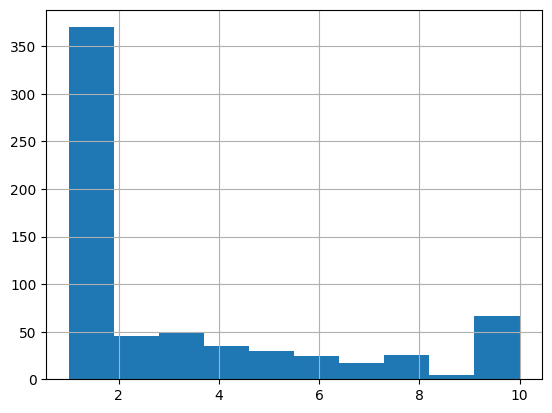

In [13]:
# Hacer un histograma de cellSize
df['cellSize'].hist()

array([[<Axes: title={'center': 'clumpThickness'}>,
        <Axes: title={'center': 'cellSize'}>,
        <Axes: title={'center': 'CellShape'}>],
       [<Axes: title={'center': 'marginalAdhesion'}>,
        <Axes: title={'center': 'epithelialSize'}>,
        <Axes: title={'center': 'bareNuclei'}>],
       [<Axes: title={'center': 'blandChromatin'}>,
        <Axes: title={'center': 'normalNucleoli'}>,
        <Axes: title={'center': 'mitoses'}>],
       [<Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

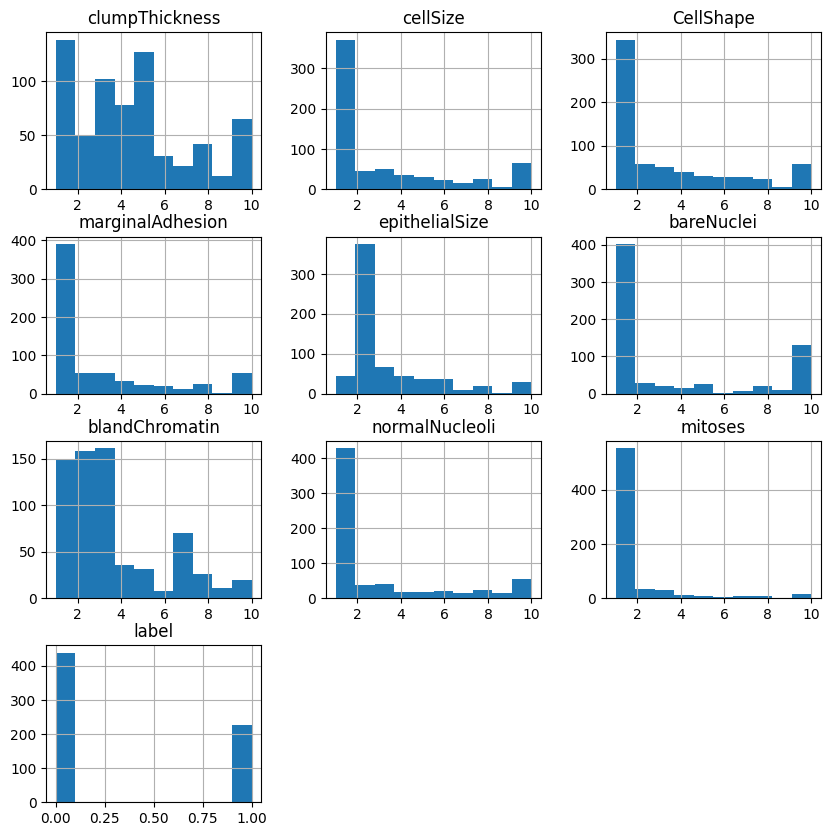

In [14]:
# Hacer un histograma de todas las variables numericas
df.hist(figsize=(10,10))

## 4.  Prepare los datos para los algoritmos de Machine Learning.

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">

División general de los datos
* **X**: Datos sin el diagnostico es decir sin la columna "label"
* **y**: Datos con el diagnostico es decir con la columna "label"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [15]:
# Crear X (Quitar la columna o campo de "label")
X=df.drop(columns='label')
X.head()

,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [16]:
# Crear y (Valor de de la columna "label")
y=df['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    0
698    0
Name: label, Length: 667, dtype: int64

In [17]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split (X,y, train_size=0.8)

In [18]:
# Revise  el tamaño de cada muestra
print( '80% ' ,df.shape[0]*0.8)
print( 'X_train ' ,X_train.shape[0])
print( 'y_train ' ,y_train.shape[0])
print( 'X_test ' ,X_test.shape[0])
print( 'y_test' ,y_test.shape[0])

80%  533.6
X_train  533
y_train  533
X_test  134
y_test 134


## 5 .  Seleccione un modelo y realice el entrenamiento (train).


<img  align="middle" style="width:750px;" src="figuras/imagesTree.jpg">



###  Árbol de decisión

In [19]:
## Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [20]:
# modelo DecisionTreeClassifier
modelo_DT=DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=5)

In [21]:
# Ajuste del modelo
modelo_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [22]:
# Predicción
y_predict=modelo_DT.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [23]:
# Prueba en y_test
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [24]:
# Comparación
np.sum(np.equal(y_predict,y_test).values)/y_predict.shape[0]

0.9701492537313433

In [25]:
# Score
modelo_DT.score(X_test, y_test)

0.9701492537313433

##   Afina(fine tune) el modelo.


In [26]:
# Ajuste de los parametros max_depth y min_samples_leaf
scores_DT=[]
for i in range (1,8) :
    for j in range (1,8) :
        #print('max_depth = ', i, 'min_samples_leaf=', j)
        modelo_DT = DecisionTreeClassifier( random_state=1,  
                                  max_depth = i,
                                  min_samples_leaf= j)
        modelo_DT.fit(  X_train, y_train  )
        #print('Score=' , modelo_DT.score( X_test, y_test ))
        #print('_')
        scores_DT.append((modelo_DT.score(X_test,y_test),i,j))

In [27]:
scores_DT.sort(reverse=True)
scores_DT[:5]
#(Score,max_depth,min_samples_leaf)

[(0.9776119402985075, 7, 3),
 (0.9776119402985075, 6, 3),
 (0.9776119402985075, 5, 3),
 (0.9776119402985075, 4, 3),
 (0.9701492537313433, 7, 7)]

### RandomForestClassifier

## Seleccione un modelo y realice el entrenamiento (train).


In [28]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
# Modelo
modelo_RF=RandomForestClassifier(random_state=1,max_depth=5,n_estimators=5)

In [30]:
# Ajuste del modelado
modelo_RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [31]:
# Predicción
modelo_RF.score(X_test, y_test)

0.9850746268656716

##  Afina(fine tune) el modelo.


In [34]:
# RandomForestClassifier(random_state=17,n_estimators=i)
scores_RF=[]
for i in range (1,8) :
    for j in range (1,8) :
        #print('max_depth = ', i, 'n.estimators=', j)
        modelo_RF = RandomForestClassifier( random_state=1,  
                                  max_depth = i,
                                  n_estimators= j)
        modelo_RF.fit(  X_train, y_train  )
        #print('Score=' , modelo_RF.score( X_test, y_test ))
        #print('_')
        scores_RF.append((modelo_RF.score(X_test,y_test),i,j))

In [35]:
scores_RF.sort(reverse=True)
scores_RF[:5]
#(Score,max_depth,n.estimators)

[(0.9925373134328358, 7, 7),
 (0.9925373134328358, 7, 6),
 (0.9925373134328358, 6, 7),
 (0.9925373134328358, 6, 6),
 (0.9925373134328358, 6, 5)]